<a href="https://www.kaggle.com/code/alisadeghiaghili/time-series-analysis-pt-1?scriptVersionId=140788649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **What is Time Series Data?**
Time series data is a type of data that is collected or recorded at regular time intervals. It represents how a particular quantity or measurement changes over time. These time intervals can be very short, such as milliseconds for financial data, or much longer, like months or years for climate data. Time series data is prevalent in various fields, including finance, economics, weather forecasting, and many more.

## **1. Components of a Time Series**
A time series typically consists of three main components:

1. **Trend:** The long-term movement or direction in the data. It represents whether the data is generally increasing, decreasing, or staying relatively constant over time.

2. **Seasonality:** The repeating patterns or fluctuations that occur at regular intervals within the data. These intervals can be daily, weekly, monthly, or any other pattern that recurs consistently.

3. **Residual (or Noise):** The random variations or irregularities in the data that cannot be attributed to the trend or seasonality. These variations can becaused by various factors and are often considered as noise in the data.

# **2. Why is Time Series Analysis Important?**
Time series analysis is crucial because it allows us to:

1. **Make Predictions:** By understanding the underlying patterns and trends, we can forecast future values in the time series data. This is particularly valuable in finance, stock market predictions, sales forecasting, and more.

2. **Detect Anomalies:** Time series analysis helps identify unusual events or outliers in the data. For example, in cybersecurity, it can be used to detect unusual network traffic patterns.

3. **Understand Historical Trends:** It provides insights into how a variable has evolved over time, which is valuable for making informed decisions.

# **3. Methods for Time Series Analysis**
Several methods and techniques are used for analyzing time series data:

## **3.1. Descriptive Analysis** 
Begin by visualizing the data using line plots, bar charts, or histograms to understand its basic characteristics. Let's take a look at an example.



In [1]:
import pandas as pd
import numpy as np
import random
import datetime

# Create a date range for 1000 days starting from a specific date
start_date = datetime.date(2020, 1, 1)
date_range = [start_date + datetime.timedelta(days=i) for i in range(1000)]

# Generate synthetic stock prices with trend, seasonality, and noise
np.random.seed(0)
t = np.arange(0, 1000)
trend = 0.1 * t  # Adding a linear trend
seasonality = 10 * np.sin(2 * np.pi * t / 365)  # Adding a seasonal component
noise = np.random.normal(0, 2, 1000)  # Adding noise

# Combine components to create synthetic stock prices
stock_prices = 100 + trend + seasonality + noise

# Create the DataFrame
stock_data = pd.DataFrame({'Date': date_range, 'Close': stock_prices})

# Set 'Date' column as the index
stock_data.set_index('Date', inplace=True)
stock_data.index = pd.to_datetime(stock_data.index)

# Display the first few rows of the DataFrame
print(stock_data.head())

                 Close
Date                  
2020-01-01  103.528105
2020-01-02  101.072448
2020-01-03  102.501692
2020-01-04  105.297983
2020-01-05  104.823140


Let's perform a descriptive analysis on the synthetic `stock_data` DataFrame we created. We will visualize the data, calculate summary statistics, and perform a seasonal decomposition.
### **3.1.1. Visualize the Time Series Data**

#### **3.1.1.1 Line Plot**
    
*     **Usage:** Line plots are excellent for visualizing how a single variable (in this case, stock prices over time) changes over a continuous range of time points.
*     **What to Look For:** Look for trends (long-term movements), seasonality (repeating patterns), and irregularities (noise) in the data.

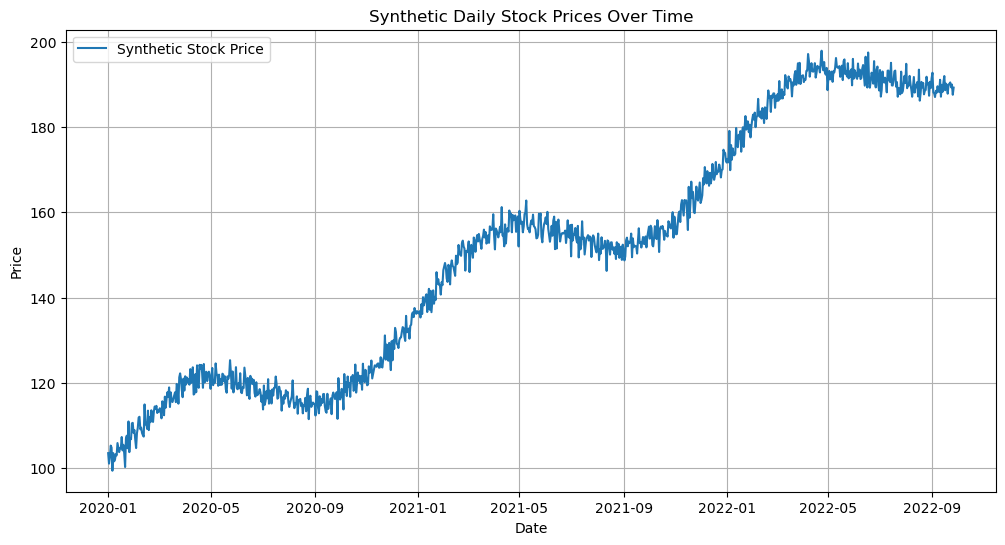

In [2]:
import matplotlib.pyplot as plt

# Create a line plot of the stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Synthetic Stock Price')
plt.title('Synthetic Daily Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### **3.1.1.2. Line Plot**
    
*     **Usage:** Bar charts are typically used to compare discrete categories or values. In time series analysis, you might use bar charts to compare data across different time periods or categories.
*     **What to Look For:** You would use bar charts if your data includes categorical information related to the time periods or you want to compare values across specific time intervals. For example, if you have monthly sales data, you could use a bar chart to compare sales across different months.

In this example, we'll use a bar chart to compare the average stock price for each year in the dataset. First, we'll prepare the data by grouping the stock prices by year and calculating the average price for each year; Then, we'll create the bar chart to visualize the average stock prices for each year.

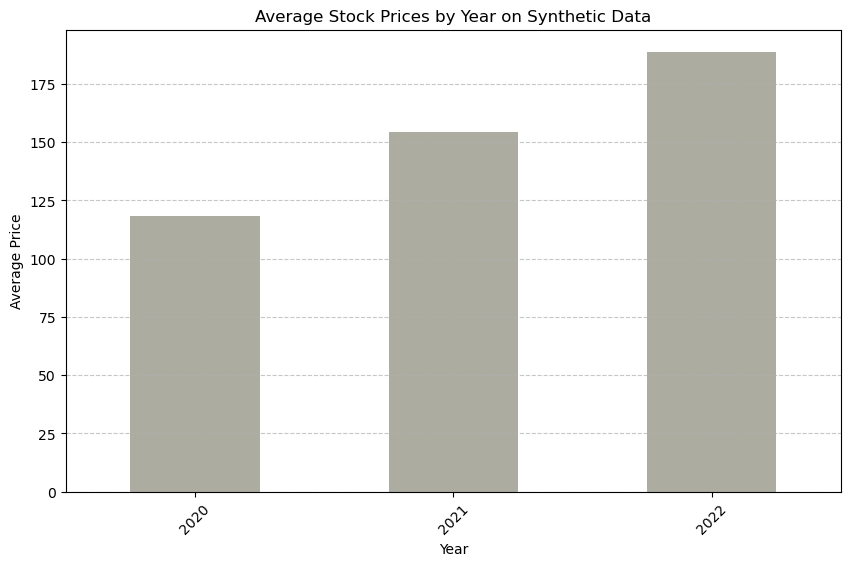

In [3]:
# Extract the year from the index and assign it to a new column
stock_data['Year'] = [d.year for d in stock_data.index]

# Group the data by year and calculate the average stock price for each year
average_prices_by_year = stock_data.groupby('Year')['Close'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
average_prices_by_year.plot(kind='bar', color='#adaca1')
plt.title('Average Stock Prices by Year on Synthetic Data')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

Use this chart to compare the average stock prices across different years. You can identify trends or fluctuations in stock prices over the years.Pay attention to any significant changes or patterns in the data. For example, you might observe whether stock prices have been generally increasing, decreasing, or staying relatively constant over the years. Bar charts are useful for comparing discrete categories (years, in this case) and are particularly helpful when you want to visualize how a particular metric (average stock price) varies across those categories (I know, as our data is not categorical we could do this by line chart too. Just consider it as an example). This type of analysis can be valuable for understanding long-term trends in your time series data.

**Pro tip:**
In the bar chart part, we used `stock_data.groupby('Year')['Close'].mean()` to calculate the average stock prices for each year. This approach is suitable when you have data with a datetime index and you want to perform aggregation based on discrete groups like years, months, or any other categorical grouping. Here's the key difference between using groupby and resample:

*    **groupby:** You use groupby when you want to group your time series data into categories (e.g., years, months, weekdays) and perform aggregation operations on each category. This is useful when you have irregular time intervals between data points. E.g: Calculating average monthly temperatures, weekly sales totals, or yearly financial summaries.

In [4]:
# stock_data.groupby('Year')['Close'].mean()

* **resample:** You use resample when you have regularly spaced time series data (e.g., daily, hourly) and want to change the frequency of your data while applying aggregation functions. E.g: Converting daily stock prices to monthly averages, downsampling hourly temperature data to daily averages.

In [5]:
# stock_data['Close'].resample('Y').mean()

When to use which method depends on your specific analysis goals and the nature of your data:

*    Use `groupby` when you have irregular or irregularly spaced time series data and you want to group it based on specific categories (like years) and perform operations within those groups.

*    Use `resample` when you have regularly spaced time series data and you want to change the frequency of your data while applying aggregation functions. resample also allows you to handle missing data more gracefully by specifying how to handle gaps.

In the case of calculating yearly average stock prices, either approach could be used depending on the nature of your data and how you prefer to work with it. Both methods can provide similar results in some cases, but resample is particularly useful for handling regular time series data with gaps and can offer more flexibility in terms of frequency conversion.

#### **3.1.1.3. Histogram**
As you may know, histogram is a graphical representation that displays the distribution of a dataset. It divides the data into bins or intervals and shows how many data points fall into each bin.
*    **Usage:** Histograms are used to understand the distribution of a continuous variable. They show how data is distributed across different value ranges or bins.
*    **What to Look For:** When dealing with time series data, histograms can help you assess the distribution of values within your time series, which can be useful for detecting outliers and understanding the data's underlying characteristics. You can check if the data is normally distributed, skewed, or has other patterns.

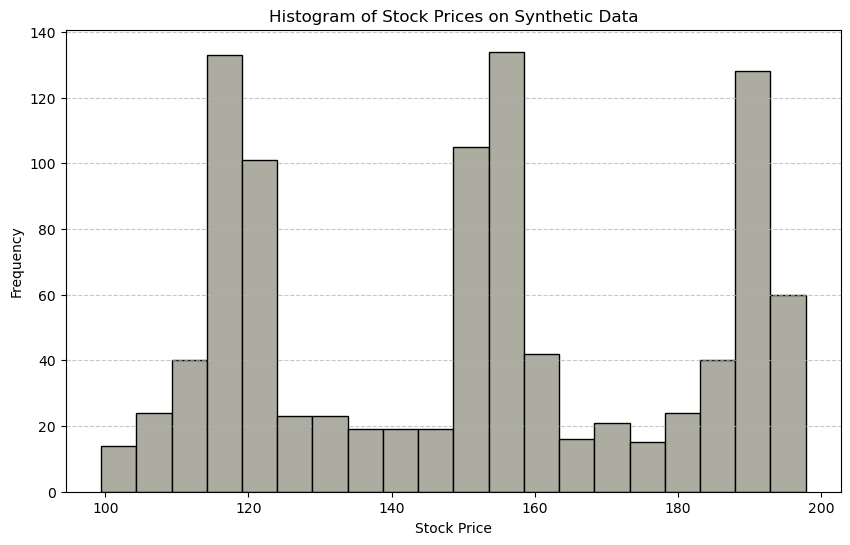

In [6]:
# Create a histogram of the 'Close' column
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=20, color='#adaca1', edgecolor='black')
plt.title('Histogram of Stock Prices on Synthetic Data')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

We can use it to make a conclusion on:
*    **Shape:** The shape of the histogram can provide insights into the distribution of the data. Common shapes include normal (bell-shaped), skewed (either left-skewed or right-skewed), and uniform.

*    **Central Tendency:** The central tendency of the data is represented by the peak of the histogram, which corresponds to the most frequent value (mode).

*    **Spread:** The spread or variability of the data can be observed by how widely the bars are distributed. A wider spread indicates greater variability.

*    **Outliers:** Outliers, if present, can be seen as data points that are far away from the main body of the histogram.

*    **Bimodality:** In some cases, you might observe multiple peaks, indicating a bimodal distribution with two distinct groups or modes in the data.

### **3.1.2. Summary Statistics**

In [7]:
# Calculate summary statistics
summary_stats = stock_data['Close'].describe()

# Print the summary statistics
print(summary_stats)


count    1000.000000
mean      150.482850
std        28.757307
min        99.405092
25%       120.885107
50%       153.005279
75%       178.831684
max       197.874976
Name: Close, dtype: float64


### **3.1.3. Seasonal Decomposition**
The seasonal decomposition will break down the synthetic time series into four components: observed, trend, seasonal, and residuals. The observed component represents the original data, the trend shows the long-term movement, the seasonal component indicates any repeating patterns, and the residuals capture the noise or irregularities in the data.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


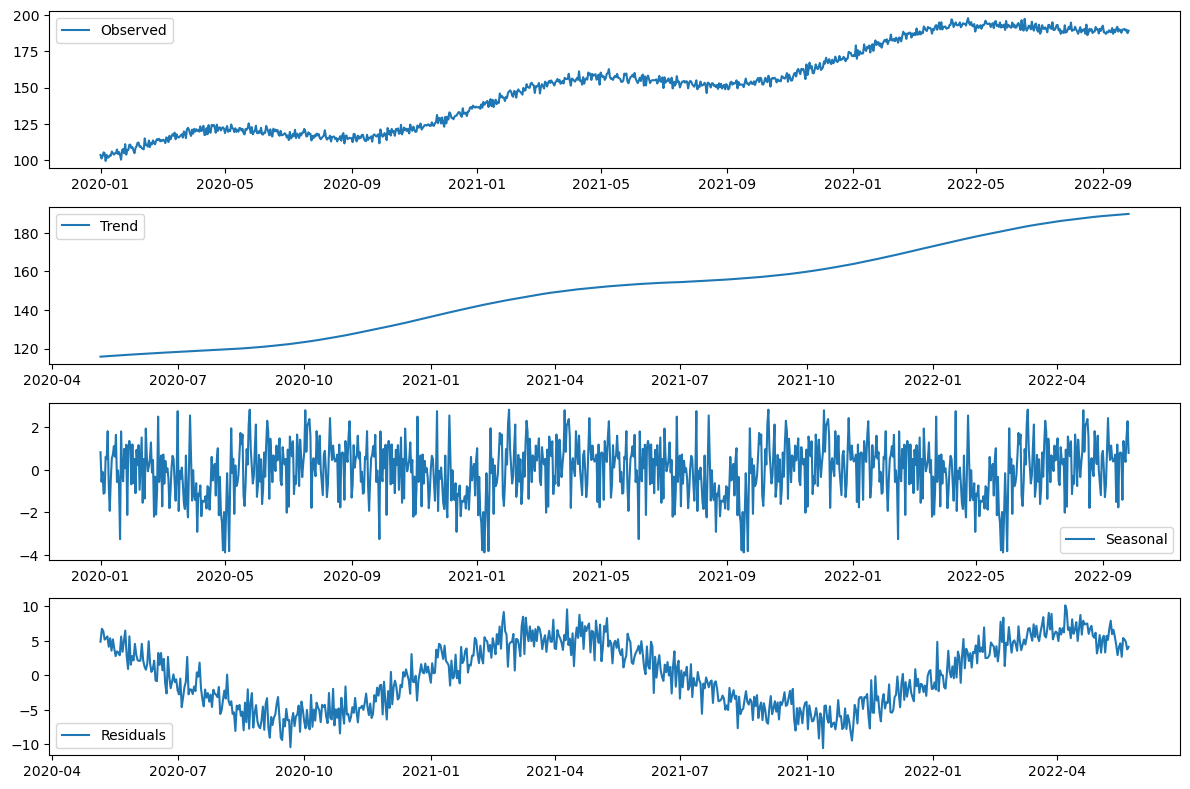

In [8]:
import statsmodels.api as sm

# Decompose the time series using statsmodels
result = sm.tsa.seasonal_decompose(stock_data['Close'], model='additive', period=252)

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

the `period` and `model` arguments in seasonal decomposition are crucial for accurately decomposing a time series into its trend, seasonal, and residual components. Let's dive into what these arguments mean and how to choose an optimal period if necessary.
* **period:** The period argument specifies the number of time periods in a season or cycle of your time series data. For example, if you're working with monthly data and there is a repeating pattern every 12 months, the period would typically be set to 12.
    This argument is essential for correctly identifying the seasonal component of your time series.
    If you have a good understanding of the underlying seasonality in your data (e.g., daily, weekly, monthly), you can specify it directly. However, if you're unsure, you may need to experiment with different values to find the optimal period. Remember that the duration of your data should be at least twice the amount you set for the period. We used 252 as we have 252 trading day in a year.
    
* **model:**     The model argument defines the type of seasonal decomposition model to use. There are two main models:
    * **'additive':** Assumes that the seasonal component is added to the trend and residual. This is appropriate when the amplitude (strength) of the seasonality does not depend on the level of the time series.
    * **'multiplicative':** Assumes that the seasonal component is multiplied by the trend and residual. This is appropriate when the amplitude of the seasonality depends on the level of the time series. For example, if the seasonality becomes proportionally larger as the values of the time series increase.

The choice between additive and multiplicative depends on the nature of your data. You may need to experiment with both to see which provides a better decomposition.
#### **3.1.3.1 Finding the Optimal period**

Choosing the correct period can be crucial for accurate seasonal decomposition. Here's how you can find an optimal period:

1. **Prior Knowledge:** If you have prior knowledge about your data and its seasonality, you can start with an initial estimate for the period. For example, for monthly data, you might start with a period of 12 for annual seasonality.

2. **Visual Inspection:** Plot your data and look for recurring patterns. If you observe clear seasonal patterns, count the number of data points within one complete cycle of the season. This can give you a reasonable estimate for the period.

3. **Auto-Correlation Function (ACF):** Calculate the autocorrelation function of your time series data. The ACF plot will show peaks at lags corresponding to the seasonal periods. You can use this information to estimate the period.

4. **Periodogram:** Compute the periodogram of your time series, which helps identify dominant frequencies or periods in the data. The highest peak in the periodogram corresponds to the seasonal period.

5. **Experimentation:** You can try different values of period and visually inspect the decomposition results. Choose the period that seems to provide the best separation of trend, seasonality, and residual components.

Remember that finding the optimal period may require some trial and error, and it's often a combination of domain knowledge and data exploration techniques. The goal is to accurately capture the underlying seasonality in your time series data.

Enough for today! I'll explain about other methods like **smoothing**, **modeling** and **forcasting** in the next notebook.
Please consider giving upvote to this note book and sharing it if you liked it.